<a href="https://colab.research.google.com/github/xieyonggang/fridaytherapy/blob/master/twitterAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install vaderSentiment
!pip install googletrans
!pip install wordcloud
!pip install tweepy
!pip install numpy
!pip install matplotlib
!pip install seaborn

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator
import tweepy
import numpy as np
import re
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import csv
import time
import sys

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

analyser = SentimentIntensityAnalyzer()
translator = Translator()

consumer_key = 'J7fkcqgeQI1CZUNqEkl9KYTqG'
consumer_secret = '3DO6z8SXRLcJgSlxC0oya5pTZaMWagm6JrUn4TICdqLTpBtu8P'
access_token = '17400743-UdQ0kM7bjEEZAsditUpbmKeYhEha4BzoaBYMObK5c'
access_token_secret = 'lwh65QOFlgGV50j5O9Wbeqdnuz2aTPontpMlJAILpUiyA'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

user_id = 'realDonaldTrump'
count=200

In [0]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text
    
    ##print("translated text = " + trans)
    
    score = analyser.polarity_scores(trans)
    
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [0]:
sentiment_analyzer_scores("The movie is VERY BAD!")

-1

In [0]:
sentiment_analyzer_scores("The movie is long!")

0

In [0]:
translator.translate('电影好难看').text

'The movie is ugly'

In [0]:
sentiment_analyzer_scores("电影好难看", False)

-1

In [0]:
def remove_pattern(text, pattern) :
    r = re.findall(pattern,text)
    for i in r :
        text = re.sub(i, '', text)
    return text

In [0]:
def clean_tweets(tweetList):
    # remove twitter Return handles (RT @xxx:)
    tweetList = np.vectorize(remove_pattern)(tweetList, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    tweetList = np.vectorize(remove_pattern)(tweetList, "@[\w]*")
    # remove URL links (httpxxx)
    tweetList = np.vectorize(remove_pattern)(tweetList, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    tweetList = np.core.defchararray.replace(tweetList, "[^a-zA-Z#]", " ")
    return tweetList

In [0]:
def list_tweets (user_id, count, prt=False):
    tweets = api.user_timeline("@"+user_id, count, tweet_mode='extended')
    tw = []
    for t in tweets :
        print(t.full_text)
        tw.append(t.full_text)
        if prt :
            print(t.full_text)
            print()
    
    return tw

In [0]:
def get_sentiment_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(sents, kde=False, bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title=title)
    #return sents

In [0]:
raw_tweets = list_tweets('realDonaldTrump',200)

@elonmusk this is amazing! https://t.co/QX6W0B9sGW
House was not cheap at $567/night Heard a lot about the 7⭐️ exp Iheard on the @mastersofscale podcast with @bchesky.This trip was less than 1⭐️. https://t.co/SyjQVsgrLw
Airbnb customer service only refunded 1/2 the cleaning fee but still took service fee for 1 night after over 30 minutes of chatting.Not looking forward to booking the next house if this is the way customers get treated when hosts post misleading pictures.
@Airbnb always had a good experience except this last time.Took the whole family to SD on our first vacation in 10 years. Horrible experience with house and customer service. House was in poor condition and not as advertised.We ended leaving after 1 night (6 originally booked).
@zefrank it’s a giant baby!!!!! https://t.co/e9FX3iv3aG
@AmyPorterfield new to your podcast!  Love it!  What tool do you use for your "text to download" feature?
@ADT @lisamarievm Just got off of a 2 hour customer service call with you guys.  Ho

In [0]:
cleaned_tweets = clean_tweets(raw_tweets)
cleaned_tweets

array([' this is amazing! ',
       'House was not cheap at $567/night Heard a lot about the 7⭐️ exp Iheard on the  podcast with .This trip was less than 1⭐️. ',
       'Airbnb customer service only refunded 1/2 the cleaning fee but still took service fee for 1 night after over 30 minutes of chatting.Not looking forward to booking the next house if this is the way customers get treated when hosts post misleading pictures.',
       ' always had a good experience except this last time.Took the whole family to SD on our first vacation in 10 years. Horrible experience with house and customer service. House was in poor condition and not as advertised.We ended leaving after 1 night (6 originally booked).',
       ' it’s a giant baby!!!!! ',
       ' new to your podcast!  Love it!  What tool do you use for your "text to download" feature?',
       '  Just got off of a 2 hour customer service call with you guys.  Horrible service.  Issue is still unresolved as I was told me snail mail somethin

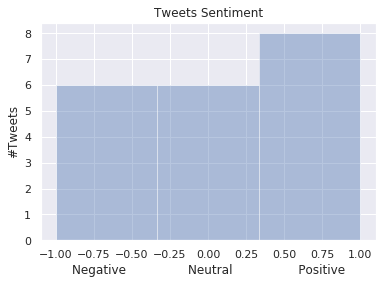

In [0]:
get_sentiment_tweets(cleaned_tweets)

In [0]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

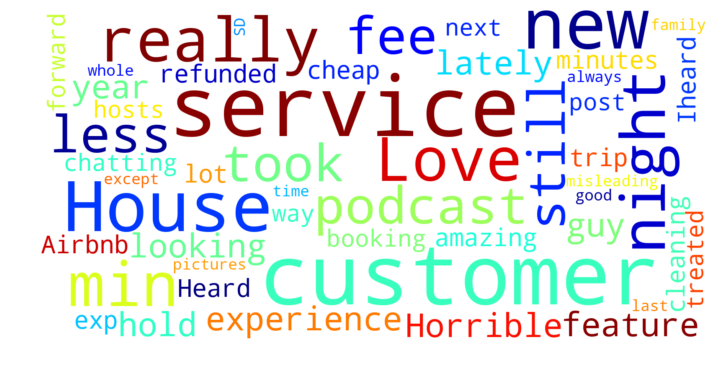

In [0]:
word_cloud(cleaned_tweets)

In [0]:
def twitter_stream_listener(file_name,
                            filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
    class CustomStreamListener(tweepy.StreamListener):
        def __init__(self, time_limit):
            self.start_time = time.time()
            self.limit = time_limit
            # self.saveFile = open('abcd.json', 'a')
            super(CustomStreamListener, self).__init__()

        def on_status(self, status):
            if (time.time() - self.start_time) < self.limit:
                print(".", end="")
                # Writing status data
                with open(file_name, 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow([
                        status.author.screen_name, status.created_at,
                        status.text
                    ])
            else:
                print("\n\n[INFO] Closing file and ending streaming")
                return False

        def on_error(self, status_code):
            if status_code == 420:
                print('Encountered error code 420. Disconnecting the stream')
                # returning False in on_data disconnects the stream
                return False
            else:
                print('Encountered error with status code: {}'.format(
                    status_code))
                return True  # Don't kill the stream

        def on_timeout(self):
            print('Timeout...')
            return True  # Don't kill the stream

    # Writing csv titles
    print(
        '\n[INFO] Open file: [{}] and starting {} seconds of streaming for {}\n'
        .format(file_name, time_limit, filter_track))
    with open(file_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(['author', 'date', 'text'])

    streamingAPI = tweepy.streaming.Stream(
        auth, CustomStreamListener(time_limit=time_limit))
    streamingAPI.filter(
        track=filter_track,
        follow=follow,
        locations=locations,
        languages=languages,
    )
    f.close()

In [0]:
filter_track = ['recession', 'stagnation','economic downturn','depression','unemployment','deflation','decline','downturn','unemployment']
file_name = 'recession_temasek_wall.csv'
twitter_stream_listener (file_name, filter_track, time_limit=60)


[INFO] Open file: [recession_temasek_wall.csv] and starting 60 seconds of streaming for ['recession', 'stagnation', 'economic downturn', 'depression', 'unemployment', 'deflation', 'decline', 'downturn', 'unemployment']

...........................................................................................................................

[INFO] Closing file and ending streaming


In [0]:
df_tws = pd.read_csv(file_name)
df_tws.head()

,author,date,text
0,ashleyhutchhins,2019-08-21 10:02:11,"RT @projectrook: Whew baby, look at all those ..."
1,TamraHinzey,2019-08-21 10:02:12,RT @parscale: .@MSNBC giddily talked about a r...
2,IsraelOyaghire,2019-08-21 10:02:13,RT @BadmanSophss: Wetin babalawo no go see for...
3,lifeofslim__,2019-08-21 10:02:13,RT @mao_0k: Unemployment must really suck: htt...
4,ZamirLX,2019-08-21 10:02:14,RT @mao_0k: Unemployment must really suck: htt...


In [0]:
df_tws['text'] = clean_tweets(df_tws['text'])

In [0]:
df_tws['text']

0       Whew baby, look at all those neurotoxins (dis...
1       . giddily talked about a recession this morni...
2                  Wetin babalawo no go see for shrine? 
3                        Unemployment must really suck: 
4                        Unemployment must really suck: 
5       Not everyone is in depression at 2am. Some ar...
6       Bila kita rasa kosong. Bila kita rasa tersisi...
7       Not a good week for Democrats:\n\n- Defending...
8       The media’s spent more time talking about the...
9       Love the minimalistic aesthetics. Mine is pur...
10      Bila kita rasa kosong. Bila kita rasa tersisi...
11      Since Obama was so quick to take credit for t...
12      Not a good week for Democrats:\n\n- Defending...
13      Don’t forget what else happened today. Trump ...
14     Nakakaimmune pala mareject no?\n\nYung paramda...
15      There is no bottom!\n“Trump said Tuesday he i...
16      Trump says economy incredibly good as he look...
17      my depression          

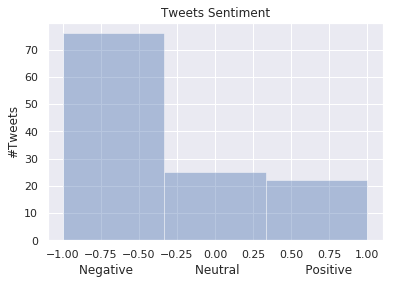

In [0]:
get_sentiment_tweets(df_tws['text'])

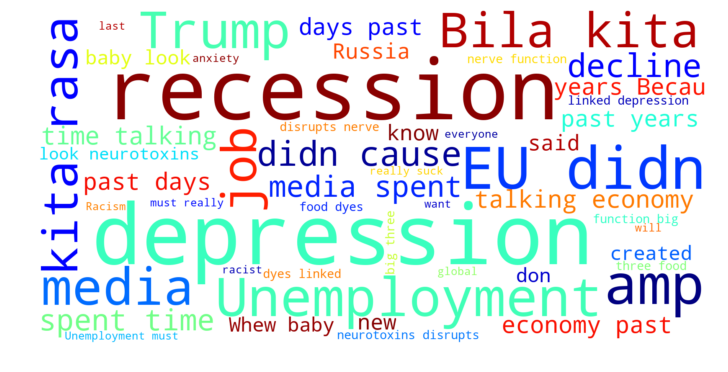

In [0]:
word_cloud(df_tws['text'])